# World Happiness Report 2025

From: https://www.worldhappiness.report/ed/2025/: ``In this year’s issue, we focus on the impact of caring and sharing on people’s happiness. Like ‘mercy’ in Shakespeare’s Merchant of Venice, caring is “twice-blessed” – it blesses those who give and those who receive. In this report, we investigate both of these effects: the benefits to the recipients of caring behaviour and the benefits to those who care for others.``

In [1]:
# Load data from: https://www.worldhappiness.report/ed/2025/. 
# Acceso directo está en: https://files.worldhappiness.report/WHR25_Data_Figure_2.1.xlsx?_gl=1*qi68f2*_gcl_au*ODQ2MjI2NDM4LjE3NTQ4NzAzMzc.
path="WHR25_Data_Figure_2.1.xlsx"

import numpy as np
import pandas as pd

df=pd.read_excel(path)

In [2]:
df

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016,138,Zimbabwe,3.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,2015,131,Zimbabwe,4.193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966,2014,115,Zimbabwe,4.610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,2012,103,Zimbabwe,4.827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Descipción de las variables:
- **Year**: año de la medición/reporte.
- **Rank**: posición del país en el ranking de felicidad.
- **Country name**: nombre del país o territorio.
- **Ladder score**: puntaje promedio de felicidad (evaluación de vida en la “escalera” 0–10).
- **upperwhisker**: límite superior del intervalo de incertidumbre del Ladder score (aprox. IC).
- **lowerwhisker**: límite inferior del intervalo de incertidumbre del Ladder score (aprox. IC).
- __**Componentes “Explained by” (aportan al puntaje)**:__
- Log GDP per capita: contribución asociada al nivel de ingreso (PIB per cápita en log).
    - **Social support**: contribución asociada a apoyo social (tener a alguien en quien confiar).
    - **Healthy life expectancy**: contribución asociada a años de vida saludables esperados.
    - **Freedom to make life choices**: contribución asociada a libertad percibida para decidir la vida propia.
    - **Generosity**: contribución asociada a conductas/prosocialidad (p. ej., donar).
    - **Perceptions of corruption**: contribución asociada a percepción de corrupción (instituciones/gobierno).
    - **Dystopia + residual**: parte “no explicada” por las variables anteriores (un baseline tipo “dystopia” + residuo que captura otros factores y error).

## 1) Explorar el dataset (columnas, tipos, faltantes)

In [3]:
# 1.1 ¿Cuántas filas y columnas hay?
df.shape

(1969, 13)

In [4]:
# 1.2 Lista de columnas (ordenadas alfabéticamente)
sorted(df.columns)

['Country name',
 'Dystopia + residual',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'Ladder score',
 'Rank',
 'Year',
 'lowerwhisker',
 'upperwhisker']

In [5]:
# 1.3 Tipos de datos
df.dtypes

Year                                            int64
Rank                                            int64
Country name                                   object
Ladder score                                  float64
upperwhisker                                  float64
lowerwhisker                                  float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
dtype: object

In [6]:
# 1.4 Conteo de faltantes por columna (top 10)
df.isna().sum().sort_values(ascending=False).head(10)

Dystopia + residual                           1101
Explained by: Healthy life expectancy         1099
Explained by: Freedom to make life choices    1098
Explained by: Perceptions of corruption       1098
Explained by: Log GDP per capita              1097
Explained by: Social support                  1097
Explained by: Generosity                      1097
upperwhisker                                  1094
lowerwhisker                                  1094
Year                                             0
dtype: int64

In [7]:
# 1.5 Resumen numérico básico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1969.0,2017.714068,3.964913,2011.000,2015.000000,2018.000000,2021.000000,2024.000000
Rank,1969.0,76.430168,43.942744,1.000,38.000000,76.000000,114.000000,158.000000
Ladder score,1969.0,5.451903,1.121864,1.364,4.596000,5.456200,6.295000,7.856000
upperwhisker,875.0,5.648684,1.103939,1.427,4.885000,5.775000,6.458500,7.904000
lowerwhisker,875.0,5.418734,1.139063,1.301,4.638164,5.529000,6.254000,7.780000
Explained by: Log GDP per capita,872.0,1.220279,0.463448,0.000,0.901355,1.263500,1.567000,2.209000
Explained by: Social support,872.0,1.078536,0.355057,0.000,0.850750,1.106699,1.361000,1.840000
Explained by: Healthy life expectancy,870.0,0.542915,0.222944,0.000,0.383000,0.555000,0.704750,1.137814
Explained by: Freedom to make life choices,871.0,0.563730,0.180204,0.000,0.450527,0.571000,0.676000,1.018000
Explained by: Generosity,872.0,0.154261,0.086731,0.000,0.092000,0.140500,0.205000,0.569814


## 2) Indexación básica: filas, columnas, celdas

In [8]:
# 2.1 Seleccionar una columna (serie)
df["Country name"].head()

0        Finland
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: Country name, dtype: object

In [9]:
# 2.2 Seleccionar varias columnas
cols = ["Year", "Rank", "Country name", "Ladder score"]
df[cols].head()

,Year,Rank,Country name,Ladder score
0,2024,1,Finland,7.736
1,2023,143,Afghanistan,1.721
2,2022,137,Afghanistan,1.859
3,2021,146,Afghanistan,2.404
4,2020,150,Afghanistan,2.523


In [10]:
# 2.3 Seleccionar filas por posición
df.iloc[0:5, :]                 # primeras 5 filas

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [11]:
df.iloc[0, :]                   # fila 0 completa

Year                                             2024
Rank                                                1
Country name                                  Finland
Ladder score                                    7.736
upperwhisker                                     7.81
lowerwhisker                                    7.662
Explained by: Log GDP per capita                1.749
Explained by: Social support                    1.783
Explained by: Healthy life expectancy           0.824
Explained by: Freedom to make life choices      0.986
Explained by: Generosity                         0.11
Explained by: Perceptions of corruption         0.502
Dystopia + residual                             1.782
Name: 0, dtype: object

In [12]:
df.iloc[0, df.columns.get_loc("Ladder score")]  # celda específica

np.float64(7.736)

In [13]:
# 2.4 Seleccionar por etiqueta (si tuvieras un índice tipo país)
# (por ahora solo demostración)
#df.set_index("Country name").loc["Finland"]
df.set_index("Country name").loc["Colombia"]

,Year,Rank,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,
Colombia,2023,78,5.6950,5.806000,5.584000,1.437000,1.241000,0.64800,0.64400,0.072000,0.059000,1.596000
Colombia,2022,72,5.6300,5.747000,5.514000,1.455000,1.213000,0.48600,0.56200,0.080000,0.068000,1.765000
Colombia,2021,66,5.7810,5.903000,5.659000,1.452000,0.929000,0.72000,0.54500,0.087000,0.077000,1.971000
Colombia,2020,53,6.0120,6.132000,5.892000,1.021000,0.866000,0.61500,0.55400,0.100000,0.063000,2.794000
Colombia,2019,44,6.1634,6.274103,6.052698,0.932204,1.334451,0.81002,0.52689,0.092374,0.045848,2.421657
Colombia,2018,43,6.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colombia,2017,37,6.2600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colombia,2016,36,6.3570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colombia,2015,31,6.4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3) Filtrado: buscar casos (país, top N, condiciones)

In [14]:
# 3.1 Filtrar por año (ej. 2025)
df_2024 = df[df["Year"] == 2024]
df_2024.shape

(147, 13)

In [15]:
df_2024

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2024,143,Zimbabwe,3.396,3.509,3.283,0.827,0.961,0.178,0.598,0.065,0.131,0.636
1918,2024,144,Malawi,3.260,3.390,3.130,0.588,0.489,0.280,0.677,0.115,0.136,0.975
1931,2024,145,Lebanon,3.188,3.277,3.098,1.223,0.984,0.440,0.279,0.071,0.041,0.150
1943,2024,146,Sierra Leone,2.998,3.102,2.894,0.786,0.692,0.327,0.613,0.138,0.052,0.391


In [16]:
# 3.2 Buscar un país (ej. Colombia) - exacto
df_2024[df_2024["Country name"] == "Colombia"][["Rank","Country name","Ladder score"]]

,Rank,Country name,Ladder score
800,61,Colombia,6.004


In [17]:
# 3.3 Buscar por texto (contiene) - cuidado con mayúsculas/minúsculas
df_2024[df_2024["Country name"].str.contains("United", case=False, na=False)][
    ["Rank","Country name","Ladder score"]
].head(10)

,Rank,Country name,Ladder score
281,21,United Arab Emirates,6.759
314,23,United Kingdom,6.728
327,24,United States,6.724


In [18]:
# 3.4 Top 10 por Ladder score (orden descendente)
df_2024.sort_values("Ladder score", ascending=False).head(10)[["Rank","Country name","Ladder score"]]

,Rank,Country name,Ladder score
0,1,Finland,7.736
13,2,Denmark,7.521
26,3,Iceland,7.515
45,4,Sweden,7.345
58,5,Netherlands,7.306
71,6,Costa Rica,7.274
84,7,Norway,7.262
97,8,Israel,7.234
109,9,Luxembourg,7.122
122,10,Mexico,6.979


In [19]:
# 3.5 Países con Rank <= 20
df_2024[df_2024["Rank"] <= 20][["Rank","Country name","Ladder score"]].sort_values("Rank")

,Rank,Country name,Ladder score
0,1,Finland,7.736
13,2,Denmark,7.521
26,3,Iceland,7.515
45,4,Sweden,7.345
58,5,Netherlands,7.306
71,6,Costa Rica,7.274
84,7,Norway,7.262
97,8,Israel,7.234
109,9,Luxembourg,7.122
122,10,Mexico,6.979


In [20]:
import matplotlib.pyplot as plt

co = df[df["Country name"]=="Colombia"].sort_values(by="Year",ascending=True)
varios=df[(df["Country name"]=="Colombia")|
    (df["Country name"]=="Finland")|
    (df["Country name"]=="India")].sort_values(by="Year",ascending=True)

In [21]:
co

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
365,2011,41,Colombia,6.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,2012,35,Colombia,6.4160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2014,33,Colombia,6.4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2015,31,Colombia,6.4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,2016,36,Colombia,6.3570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,2017,37,Colombia,6.2600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,2018,43,Colombia,6.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,2019,44,Colombia,6.1634,6.274103,6.052698,0.932204,1.334451,0.81002,0.52689,0.092374,0.045848,2.421657
357,2020,53,Colombia,6.0120,6.132000,5.892000,1.021000,0.866000,0.61500,0.55400,0.100000,0.063000,2.794000
356,2021,66,Colombia,5.7810,5.903000,5.659000,1.452000,0.929000,0.72000,0.54500,0.087000,0.077000,1.971000


In [22]:
varios

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
575,2011,2,Finland,7.5790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,2011,41,Colombia,6.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,2011,94,India,4.9750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,2012,111,India,4.7720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,2012,7,Finland,7.3890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,2012,35,Colombia,6.4160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,2014,6,Finland,7.4060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2014,33,Colombia,6.4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758,2014,117,India,4.5650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,2015,118,India,4.4040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1) Figura de serie de tiempo: evolución de Colombia
Opción A: Ladder score por año con banda (lower/upper).

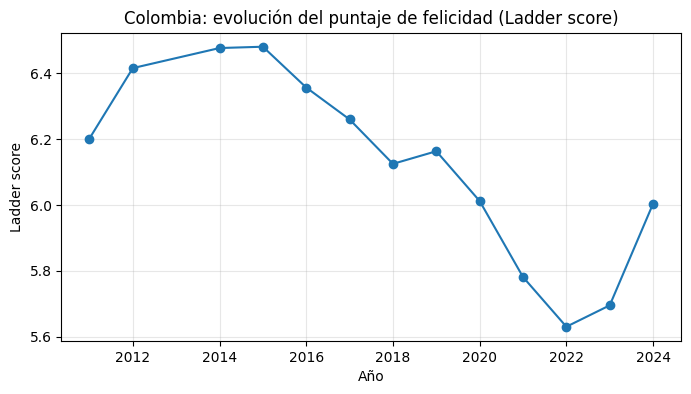

In [23]:
plt.figure(figsize=(8,4))
plt.plot(co["Year"], co["Ladder score"], marker="o")
plt.title("Colombia: evolución del puntaje de felicidad (Ladder score)")
plt.xlabel("Año")
plt.ylabel("Ladder score")
plt.grid(True, alpha=0.3)
plt.show()

## 2) Barra apilada solo para Colombia en 2025 (componentes)
Esto replica la lógica de la figura WHR: componentes “Explained by” + Dystopia + residual, y a la derecha el Ladder score con whiskers.

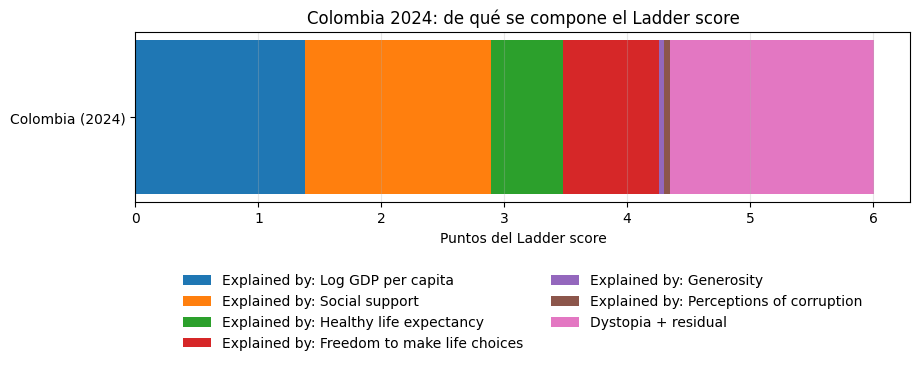

Ladder score (2025): 6.004
Suma de componentes: 6.004999999999999


In [24]:
# =========================
# FIGURA 2: Barra apilada 2025
# =========================

# 1) Tomar la fila de Colombia en 2025
co2024 = df[(df["Country name"] == "Colombia") & (df["Year"] == 2024)].iloc[0]

# 2) Lista de columnas (componentes)
cols = [
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
    "Dystopia + residual",
]

# 3) Dibujar barra apilada (una sola barra)
left = 0
plt.figure(figsize=(10,2.2))

for c in cols:
    value = co2024[c]
    plt.barh("Colombia (2024)", value, left=left, label=c)
    left = left + value

plt.title("Colombia 2024: de qué se compone el Ladder score")
plt.xlabel("Puntos del Ladder score")
plt.legend(ncols=2, bbox_to_anchor=(0.5, -0.35), loc="upper center", frameon=False)
plt.grid(True, axis="x", alpha=0.3)
plt.show()

# (opcional) imprimir el total
print("Ladder score (2025):", co2024["Ladder score"])
print("Suma de componentes:", sum(co2024[c] for c in cols))

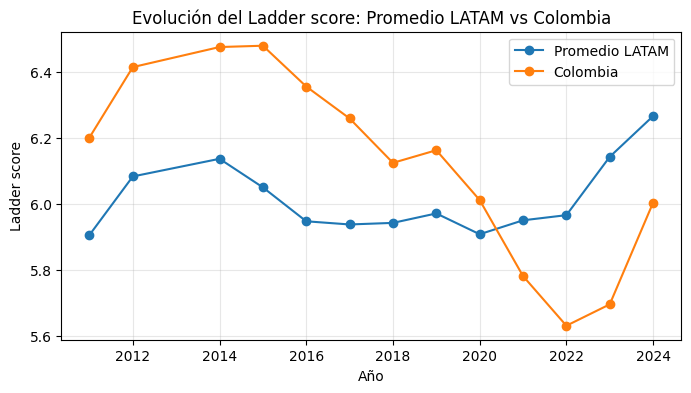

In [25]:
# =========================
# 0) Lista LATAM (editable)
# =========================
latam = [
    "Argentina","Bolivia","Brazil","Chile","Colombia","Costa Rica","Cuba",
    "Dominican Republic","Ecuador","El Salvador","Guatemala","Haiti","Honduras",
    "Jamaica","Mexico","Nicaragua","Panama","Paraguay","Peru","Uruguay","Venezuela"
]

# Filtrar LATAM
la = df[df["Country name"].isin(latam)].copy()
la = la.sort_values("Year")

# =========================
# FIGURA 1: Serie de tiempo
# Promedio LATAM vs Colombia
# =========================
la_mean = la.groupby("Year")["Ladder score"].mean().reset_index()

co = df[df["Country name"] == "Colombia"].sort_values("Year")

plt.figure(figsize=(8,4))
plt.plot(la_mean["Year"], la_mean["Ladder score"], marker="o", label="Promedio LATAM")
plt.plot(co["Year"], co["Ladder score"], marker="o", label="Colombia")
plt.title("Evolución del Ladder score: Promedio LATAM vs Colombia")
plt.xlabel("Año")
plt.ylabel("Ladder score")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

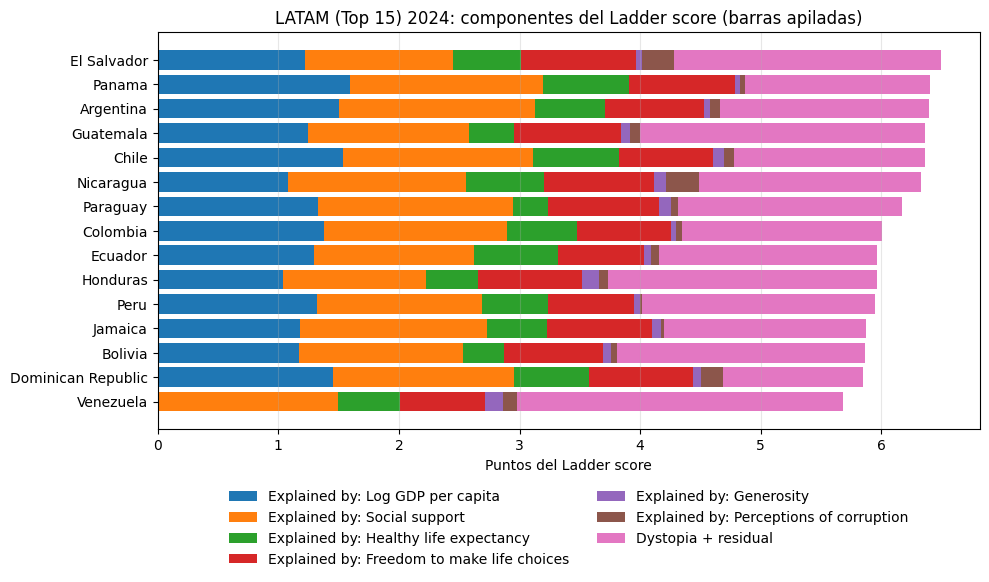

In [26]:
# =========================
# FIGURA 2: Barras apiladas 2025
# Top 10 LATAM por Ladder score
# =========================
cols = [
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
    "Dystopia + residual",
]

la2024 = la[la["Year"] == 2024].copy()

# Top 10 LATAM en 2025
top15 = la2024.sort_values("Ladder score", ascending=True).head(15)

# Preparar nombres para el eje y
names = top15["Country name"].tolist()

plt.figure(figsize=(10,6))

# Barra apilada por país
left = [0]*len(top15)

for c in cols:
    values = top15[c].tolist()
    plt.barh(names, values, left=left, label=c)
    left = [left[i] + values[i] for i in range(len(values))]

plt.title("LATAM (Top 15) 2024: componentes del Ladder score (barras apiladas)")
plt.xlabel("Puntos del Ladder score")
plt.grid(True, axis="x", alpha=0.3)
plt.legend(ncols=2, bbox_to_anchor=(0.5, -0.12), loc="upper center", frameon=False)
plt.tight_layout()
plt.show()


In [27]:
la2024

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
852,2024,65,Peru,5.947,6.049,5.844,1.323,1.364,0.551,0.710,0.050,0.021,1.929
377,2024,28,Uruguay,6.661,6.743,6.578,1.554,1.654,0.523,0.913,0.078,0.197,1.741
122,2024,10,Mexico,6.979,7.068,6.889,1.435,1.504,0.550,0.879,0.057,0.118,2.438
484,2024,36,Brazil,6.494,6.593,6.394,1.391,1.519,0.480,0.830,0.089,0.127,2.057
495,2024,37,El Salvador,6.492,6.619,6.365,1.222,1.228,0.559,0.955,0.054,0.264,2.211
547,2024,41,Panama,6.407,6.531,6.284,1.594,1.600,0.717,0.876,0.041,0.042,1.537
550,2024,42,Argentina,6.397,6.492,6.302,1.504,1.622,0.579,0.824,0.048,0.083,1.736
576,2024,44,Guatemala,6.362,6.503,6.222,1.249,1.330,0.376,0.882,0.075,0.085,2.365
589,2024,45,Chile,6.361,6.449,6.273,1.537,1.577,0.711,0.779,0.093,0.085,1.579
608,2024,47,Nicaragua,6.330,6.475,6.186,1.084,1.470,0.646,0.912,0.103,0.271,1.844


In [28]:
top15

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
1068,2024,82,Venezuela,5.683,5.796,5.570,0.000,1.493,0.515,0.702,0.154,0.117,2.701
990,2024,76,Dominican Republic,5.846,5.988,5.705,1.457,1.500,0.615,0.866,0.063,0.186,1.160
967,2024,74,Bolivia,5.868,5.977,5.758,1.173,1.356,0.346,0.817,0.067,0.052,2.057
954,2024,73,Jamaica,5.870,6.178,5.563,1.182,1.545,0.504,0.869,0.075,0.019,1.676
852,2024,65,Peru,5.947,6.049,5.844,1.323,1.364,0.551,0.710,0.050,0.021,1.929
826,2024,63,Honduras,5.964,6.108,5.821,1.036,1.187,0.436,0.862,0.134,0.079,2.229
813,2024,62,Ecuador,5.965,6.083,5.848,1.299,1.320,0.702,0.712,0.058,0.066,1.808
800,2024,61,Colombia,6.004,6.112,5.897,1.380,1.513,0.587,0.777,0.039,0.051,1.658
709,2024,54,Paraguay,6.172,6.279,6.064,1.329,1.615,0.291,0.921,0.097,0.063,1.857
608,2024,47,Nicaragua,6.330,6.475,6.186,1.084,1.470,0.646,0.912,0.103,0.271,1.844
